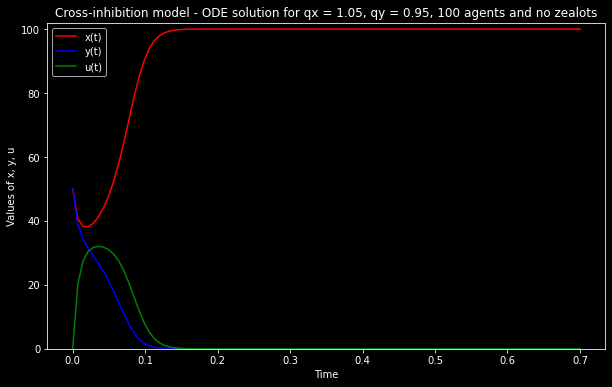

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
N=100
qx = 1.05
qy = 0.95
z = 0

# Define the system of ODEs
def system(t, vars):
    x, y, u = vars
    dxdt = -qy * x * y - qy * x * 0.5*z + qx * x * u + qx * u * 0.5*z
    dydt = -qx * x * y - qx * y * 0.5*z + qy * u * 0.5*z + qy * y * u
    dudt = -dxdt-dydt#qx * x * y + qy * x * y + qy * x * z + qx * y * z - qx * x * u - qy * y * u - qy * u * z - qx * u * z
    return [dxdt, dydt, dudt]

# Initial conditions
initial_conditions = [50, 50, 0]
t_span = (0, 0.7)  # Time interval for the solution
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Points at which to evaluate

# Solve the system
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Plot each variable over time
plt.figure(figsize=(10, 6))

plt.plot(solution.t, solution.y[0], label='x(t)', color='red')
plt.plot(solution.t, solution.y[1], label='y(t)', color='blue')
plt.plot(solution.t, solution.y[2], label='u(t)', color='green')

# Set y-axis range to [0, 100]
plt.ylim(0, 102)

plt.xlabel('Time')
plt.ylabel('Values of x, y, u')
plt.legend()
plt.title('Cross-inhibition model - ODE solution for qx = 1.05, qy = 0.95, 100 agents and no zealots')
plt.show()


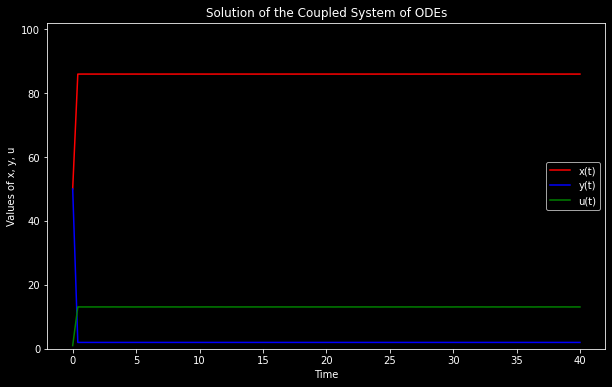

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
N=100
qx = 1.05
qy = 0.95
z = 30

# Define the system of ODEs
def system(t, vars):
    x, y, u = vars
    dxdt = -qy * x * y - qy * x * 0.5*z + qx * x * u + qx * u * 0.5*z
    dydt = -qx * x * y - qx * y * 0.5*z + qy * u * 0.5*z + qy * y * u
    dudt = -dxdt-dydt#qx * x * y + qy * x * y + qy * x * z + qx * y * z - qx * x * u - qy * y * u - qy * u * z - qx * u * z
    return [dxdt, dydt, dudt]

# Initial conditions
initial_conditions = [50, 50, 1]
t_span = (0, 40)  # Time interval for the solution
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Points at which to evaluate

# Solve the system
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Plot each variable over time
plt.figure(figsize=(10, 6))

plt.plot(solution.t, solution.y[0], label='x(t)', color='red')
plt.plot(solution.t, solution.y[1], label='y(t)', color='blue')
plt.plot(solution.t, solution.y[2], label='u(t)', color='green')

# Set y-axis range to [0, 100]
plt.ylim(0, 102)

plt.xlabel('Time')
plt.ylabel('Values of x, y, u')
plt.legend()
plt.title('Solution of the Coupled System of ODEs')
plt.show()


## Solution of the ODE system for the cross-inhibition model with zealots

z = 10, c = 1
z = 30, c = 1
z = 48, c = 1
z = 49, c = 0


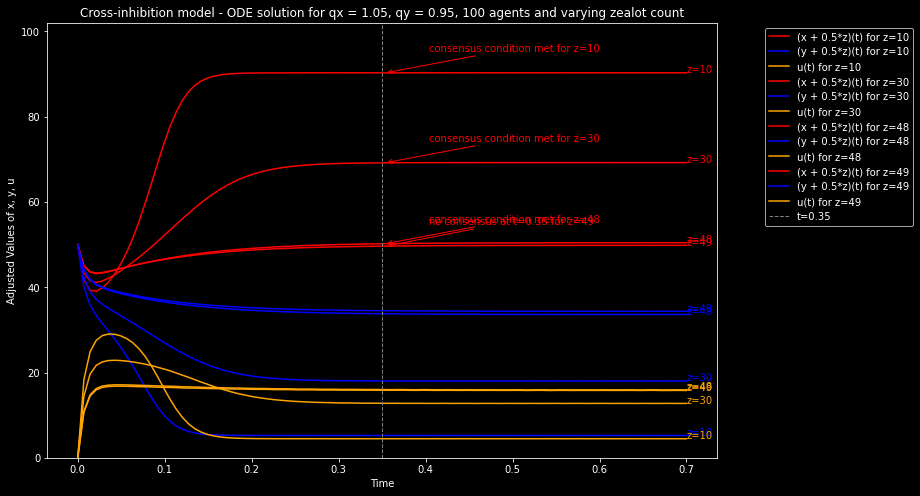

[0 0 0 0]


In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters qx and qy
qx = 1.05
qy = 0.95

# Define the system of ODEs with z as a variable parameter
def system(t, vars, qx, qy, z):
    x, y, u = vars
    dxdt = -qy * x * y - qy * x * 0.5*z + qx * x * u + qx * u * 0.5*z
    dydt = -qx * x * y - qx * y * 0.5*z + qy * u * 0.5*z + qy * y * u  # Corrected term
    dudt = -(dxdt+dydt)#qx * x * y + qy * x * y + qy * x * 0.5*z + qx * y * 0.5*z - qx * x * u - qy * y * u - qy * u * 0.5*z - qx * u * 0.5*z
    return [dxdt, dydt, dudt]

# Initial conditions function dependent on z
def initial_conditions(z):
    x0 = 50 - 0.5 * z
    y0 = 50 - 0.5 * z
    u0 = 0  
    return [x0, y0, u0]

# Time setup
t_span = (0, 0.7)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Define specific values of z to test
z_values = [10,30,48,49]
#z_values = np.arange(2, 70, 2)

# Define a Boolean function for each z value (e.g., z > 35)
# Modify this line to use your specific Boolean function for z
consensus_values = np.zeros(len(z_values), dtype=int)#z_values > 35  # Returns True if z > 35, False otherwise

# Plotting setup
plt.figure(figsize=(12, 8))
colors = {'x': 'red', 'y': 'blue', 'u': 'orange'}

# Loop through each z value, solve the ODEs, and plot adjusted values
for z in z_values:
    # Get initial conditions based on z
    init_cond = initial_conditions(z)
    
    # Solve the ODE system with the updated initial conditions
    solution = solve_ivp(system, t_span, init_cond, args=(qx, qy, z), t_eval=t_eval)
    
    # Compute adjusted values for plotting
    adjusted_x = solution.y[0] + 0.5 * z
    adjusted_y = solution.y[1] + 0.5 * z
    
    # Plot each adjusted variable with consistent colors
    plt.plot(solution.t, adjusted_x, label=f'(x + 0.5*z)(t) for z={z}', color=colors['x'])
    plt.plot(solution.t, adjusted_y, label=f'(y + 0.5*z)(t) for z={z}', color=colors['y'])
    plt.plot(solution.t, solution.y[2], label=f'u(t) for z={z}', color=colors['u'])
    
    # Label the last point of each curve with the value of z
    plt.text(solution.t[-1], adjusted_x[-1], f'z={z}', color=colors['x'])
    plt.text(solution.t[-1], adjusted_y[-1], f'z={z}', color=colors['y'])
    plt.text(solution.t[-1], solution.y[2][-1], f'z={z}', color=colors['u'])
    
    # Check the condition (x + 0.5*z)(t) - (y + 0.5*z)(t) >= 10 at t = 0.35
    idx_035 = np.searchsorted(t_eval, 0.35)
    if idx_035 < len(solution.t):
        x_035 = adjusted_x[idx_035]
        y_035 = adjusted_y[idx_035]
        condition = (x_035>50) and (x_035 - y_035 >= 10)
        print(f"z = {z}, c = {int(condition)}")
        if condition:
            plt.annotate(f'consensus condition met for z={z}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])
        else:
            plt.annotate(f'no consensus at t=0.35 for z={z}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])

# Add vertical line at t = 0.35
plt.axvline(x=0.35, color='gray', linestyle='--', linewidth=1, label='t=0.35')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Adjusted Values of x, y, u')
plt.ylim(0, 102)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Cross-inhibition model - ODE solution for qx = 1.05, qy = 0.95, 100 agents and varying zealot count')
plt.show()

print(consensus_values)




### Voter model with zealots


z = 10, c = 1
z = 20, c = 1
z = 32, c = 1
z = 34, c = 0
z = 36, c = 0


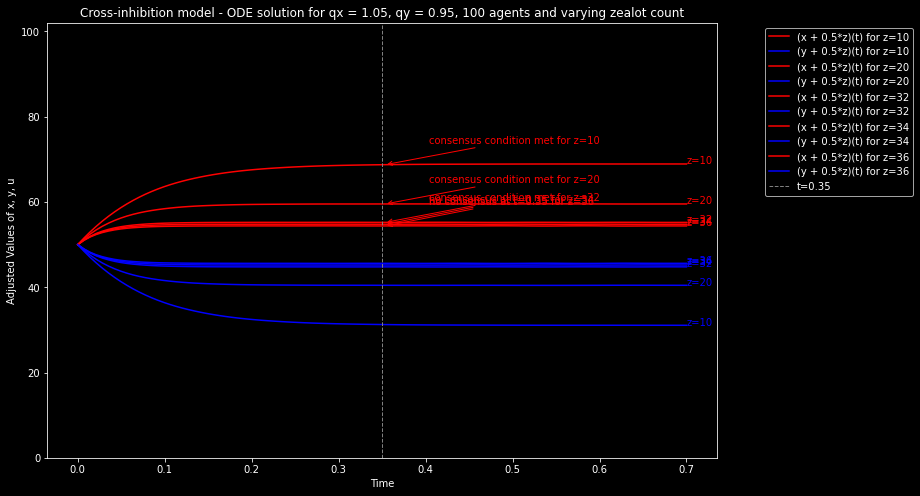

[0 0 0 0 0]


In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters qx and qy
qx = 1.05
qy = 0.95

# Define the system of ODEs with z as a variable parameter
def system(t, vars, qx, qy, z):
    x, y = vars
    dxdt = -qy * x * y - qy * x * 0.5*z + qx * x * y + qx * y * 0.5*z
    dydt = -qx * x * y - qx * y * 0.5*z + qy * x * y + qy * x * 0.5*z
    return [dxdt, dydt]

# Initial conditions function dependent on z
def initial_conditions(z):
    x0 = 50 - 0.5 * z
    y0 = 50 - 0.5 * z
    return [x0, y0]

# Time setup
t_span = (0, 0.7)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Define specific values of z to test
z_values = [10,20,32,34,36]
#z_values = np.arange(2, 70, 2)

# Define a Boolean function for each z value (e.g., z > 35)
# Modify this line to use your specific Boolean function for z
consensus_values = np.zeros(len(z_values), dtype=int)#z_values > 35  # Returns True if z > 35, False otherwise

# Plotting setup
plt.figure(figsize=(12, 8))
colors = {'x': 'red', 'y': 'blue'}

# Loop through each z value, solve the ODEs, and plot adjusted values
for z in z_values:
    # Get initial conditions based on z
    init_cond = initial_conditions(z)
    
    # Solve the ODE system with the updated initial conditions
    solution = solve_ivp(system, t_span, init_cond, args=(qx, qy, z), t_eval=t_eval)
    
    # Compute adjusted values for plotting
    adjusted_x = solution.y[0] + 0.5 * z
    adjusted_y = solution.y[1] + 0.5 * z
    
    # Plot each adjusted variable with consistent colors
    plt.plot(solution.t, adjusted_x, label=f'(x + 0.5*z)(t) for z={z}', color=colors['x'])
    plt.plot(solution.t, adjusted_y, label=f'(y + 0.5*z)(t) for z={z}', color=colors['y'])
    #plt.plot(solution.t, solution.y[2], label=f'u(t) for z={z}', color=colors['u'])
    
    # Label the last point of each curve with the value of z
    plt.text(solution.t[-1], adjusted_x[-1], f'z={z}', color=colors['x'])
    plt.text(solution.t[-1], adjusted_y[-1], f'z={z}', color=colors['y'])
    #plt.text(solution.t[-1], solution.y[2][-1], f'z={z}', color=colors['u'])
    
    # Check the condition (x + 0.5*z)(t) - (y + 0.5*z)(t) >= 10 at t = 0.35
    idx_035 = np.searchsorted(t_eval, 0.35)
    if idx_035 < len(solution.t):
        x_035 = adjusted_x[idx_035]
        y_035 = adjusted_y[idx_035]
        condition = (x_035>50) and (x_035 - y_035 >= 10)
        print(f"z = {z}, c = {int(condition)}")
        if condition:
            plt.annotate(f'consensus condition met for z={z}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])
        else:
            plt.annotate(f'no consensus at t=0.35 for z={z}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])

# Add vertical line at t = 0.35
plt.axvline(x=0.35, color='gray', linestyle='--', linewidth=1, label='t=0.35')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Adjusted Values of x, y, u')
plt.ylim(0, 102)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Cross-inhibition model - ODE solution for qx = 1.05, qy = 0.95, 100 agents and varying zealot count')
plt.show()

print(consensus_values)




## Cross-inh. model with contrarians: where is the phase transition in terms of c?

c_total = 10, c_total = 1
c_total = 26, c_total = 1
c_total = 28, c_total = 0
c_total = 30, c_total = 0
c_total = 32, c_total = 0
c_total = 34, c_total = 0


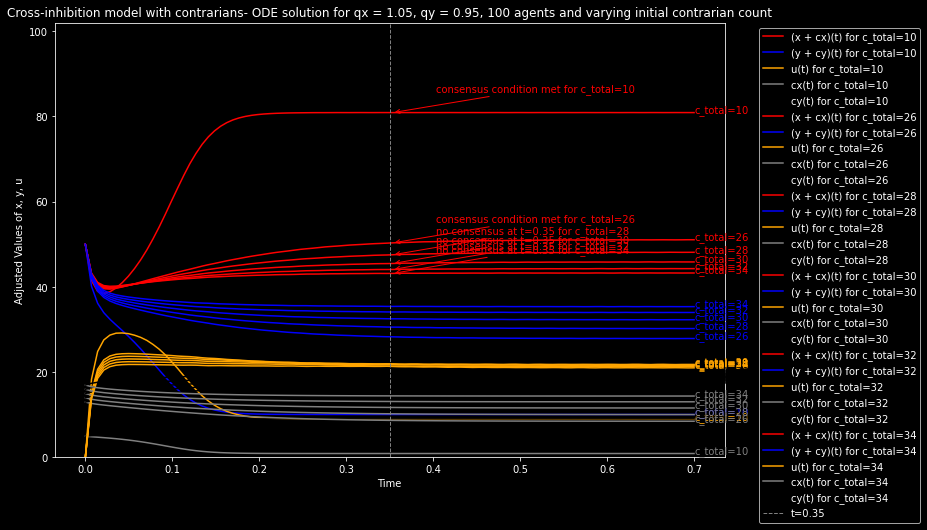

[0 0 0 0 0 0]


In [59]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters qx and qy
qx = 1.05
qy = 0.95

# Define the system of ODEs with z as a variable parameter
def system(t, vars, qx, qy, cx, cy):
    x, y, u, cx, cy = vars
    dxdt = -qy * x * y - qy * x * cy + qx * x * u + qx * u * cx
    dydt = -qx * x * y - qx * y * cx + qy * y * u  + qy * u * cy  # Corrected term
    dudt = qx*x*y+qy*x*y+qy*x*cy+qx*y*cx  -qx*x*u-qy*y*u -qy*u*cy-qx*u*cx
    dcxdt = -qx*x*cx-2*qx*cx*((cx-1)/2)+qy*y*cy+2*qy*cy*((cy-1)/2)
    dcydt = -qy*y*cy-2*qy*cy*((cy-1)/2)+qx*x*cx+2*qx*cx*((cx-1)/2)
    return [dxdt, dydt, dudt, dcxdt, dcydt]

# Initial conditions function dependent on z
def initial_conditions(c_total):
    x0 = 50 - 0.5 * c_total
    y0 = 50 - 0.5 * c_total
    u0 = 0
    cx0 = c_total*0.5
    cy0 = c_total*0.5
    return [x0, y0, u0, cx0, cy0]

# Time setup
t_span = (0, 0.7)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Define specific values of z to test
c_values = [10, 26, 28, 30, 32, 34]

# Define a Boolean function for each z value (e.g., c > 35)
# Modify this line to use your specific Boolean function for z
consensus_values = np.zeros(len(c_values), dtype=int)#z_values > 35  # Returns True if z > 35, False otherwise

# Plotting setup
plt.figure(figsize=(12, 8))
colors = {'x': 'red', 'y': 'blue', 'u': 'orange', 'cx':'gray', 'cy': 'black'}

# Loop through each z value, solve the ODEs, and plot adjusted values
for c_total in c_values:
    # Get initial conditions based on z
    init_cond = initial_conditions(c_total)

    cx = c_total*0.5
    cy = c_total*0.5
    
    # Solve the ODE system with the updated initial conditions
    solution = solve_ivp(system, t_span, init_cond, args=(qx, qy, cx, cy), t_eval=t_eval)
    
    # Compute adjusted values for plotting
    adjusted_x = solution.y[0] + solution.y[3] # sum up x and cx
    adjusted_y = solution.y[1] + solution.y[4] # sum up y and cy
    
    # Plot each adjusted variable with consistent colors
    plt.plot(solution.t, adjusted_x, label=f'(x + cx)(t) for c_total={c_total}', color=colors['x'])
    plt.plot(solution.t, adjusted_y, label=f'(y + cy)(t) for c_total={c_total}', color=colors['y'])
    plt.plot(solution.t, solution.y[2], label=f'u(t) for c_total={c_total}', color=colors['u'])
    plt.plot(solution.t, solution.y[3], label=f'cx(t) for c_total={c_total}', color=colors['cx'])
    plt.plot(solution.t, solution.y[4], label=f'cy(t) for c_total={c_total}', color=colors['cy'])

    # Label the last point of each curve with the value of z
    plt.text(solution.t[-1], adjusted_x[-1], f'c_total={c_total}', color=colors['x'])
    plt.text(solution.t[-1], adjusted_y[-1], f'c_total={c_total}', color=colors['y'])
    plt.text(solution.t[-1], solution.y[2][-1], f'c_total={c_total}', color=colors['u'])
    plt.text(solution.t[-1], solution.y[3][-1], f'c_total={c_total}', color=colors['cx'])
    plt.text(solution.t[-1], solution.y[4][-1], f'c_total={c_total}', color=colors['cy'])
    
    # Check the condition (x + 0.5*z)(t) - (y + 0.5*z)(t) >= 10 at t = 0.35
    idx_035 = np.searchsorted(t_eval, 0.35)
    if idx_035 < len(solution.t):
        x_035 = adjusted_x[idx_035]
        y_035 = adjusted_y[idx_035]
        condition = (x_035>50) and (x_035 - y_035 >= 10)
        print(f"c_total = {c_total}, c_total = {int(condition)}")
        if condition:
            plt.annotate(f'consensus condition met for c_total={c_total}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])
        else:
            plt.annotate(f'no consensus at t=0.35 for c_total={c_total}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])

# Add vertical line at t = 0.35
plt.axvline(x=0.35, color='gray', linestyle='--', linewidth=1, label='t=0.35')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Adjusted Values of x, y, u')
plt.ylim(0, 102)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Cross-inhibition model with contrarians- ODE solution for qx = 1.05, qy = 0.95, 100 agents and varying initial contrarian count')
plt.show()

print(consensus_values)




### voter model with contrarians

c_total = 10, c_total = 1
c_total = 12, c_total = 1
c_total = 14, c_total = 1
c_total = 16, c_total = 0
c_total = 20, c_total = 0
c_total = 35, c_total = 0


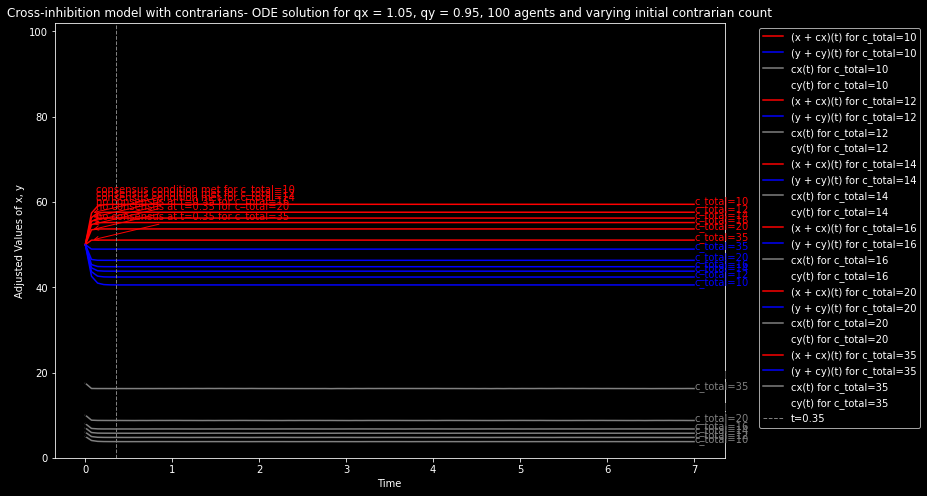

[0 0 0 0 0 0]


In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters qx and qy
qx = 1.05
qy = 0.95

# Define the system of ODEs with z as a variable parameter
def system(t, vars, qx, qy, c_total):
    x, y, cx, cy = vars
    #dxdt = qx*x*y-qy * x * y  #tanja
    dxdt = qx*x*y - qy*x*y - qy*x*cy + qx*y*cx 

    #dydt = qy*x*y-qx * x * y  #tanja
    dydt = -qx*x*y + qy*x*y + qy*x*cy - qx*y*cx
    
    #dcxdt = -qx*x*cx -2*qx*cx*cx +qy*y*cy +2*qy*cy*cy # 
    dcxdt = -qx*x*cx -2*qx*cx*((cx-1)/2) +qy*y*cy +2*qy*cy*((cy-1)/2)
    #dcydt = -qy*y*cy -2*qy*cy*cy +qx*x*cx +2*qx*cx*cx #
    dcydt = -qy*y*cy-2*qy*cy*((cy-1)/2)+qx*x*cx+2*qx*cx*((cx-1)/2)
    return [dxdt, dydt, dcxdt, dcydt]

# Initial conditions function dependent on z
def initial_conditions(c_total):
    x0 = 50 - 0.5 * c_total
    y0 = 50 - 0.5 * c_total
    cx0 = c_total*0.5
    cy0 = c_total*0.5
    return [x0, y0, cx0, cy0]

# Time setup
t_span = (0, 7)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Define specific values of z to test
c_values = [10,12,14,16,20,35]

# Define a Boolean function for each z value (e.g., c > 35)
# Modify this line to use your specific Boolean function for z
consensus_values = np.zeros(len(c_values), dtype=int)#z_values > 35  # Returns True if z > 35, False otherwise

# Plotting setup
plt.figure(figsize=(12, 8))
colors = {'x': 'red', 'y': 'blue', 'u': 'orange', 'cx':'gray', 'cy': 'black'}

# Loop through each z value, solve the ODEs, and plot adjusted values
for c_total in c_values:
    # Get initial conditions based on z
    init_cond = initial_conditions(c_total)
    
    # Solve the ODE system with the updated initial conditions
    solution = solve_ivp(system, t_span, init_cond, args=(qx, qy, c_total), t_eval=t_eval)
    
    # Compute adjusted values for plotting
    adjusted_x = solution.y[0] + solution.y[2] # sum up x and cx
    adjusted_y = solution.y[1] + solution.y[3] # sum up y and cy
    
    # Plot each adjusted variable with consistent colors
    plt.plot(solution.t, adjusted_x, label=f'(x + cx)(t) for c_total={c_total}', color=colors['x'])
    plt.plot(solution.t, adjusted_y, label=f'(y + cy)(t) for c_total={c_total}', color=colors['y'])
    #plt.plot(solution.t, solution.y[2], label=f'u(t) for c_total={c_total}', color=colors['u'])
    plt.plot(solution.t, solution.y[2], label=f'cx(t) for c_total={c_total}', color=colors['cx'])
    plt.plot(solution.t, solution.y[3], label=f'cy(t) for c_total={c_total}', color=colors['cy'])

    # Label the last point of each curve with the value of z
    plt.text(solution.t[-1], adjusted_x[-1], f'c_total={c_total}', color=colors['x'])
    plt.text(solution.t[-1], adjusted_y[-1], f'c_total={c_total}', color=colors['y'])
    #plt.text(solution.t[-1], solution.y[2][-1], f'c_total={c_total}', color=colors['u'])
    plt.text(solution.t[-1], solution.y[2][-1], f'c_total={c_total}', color=colors['cx'])
    plt.text(solution.t[-1], solution.y[3][-1], f'c_total={c_total}', color=colors['cy'])
    
    # Check the condition (x + 0.5*z)(t) - (y + 0.5*z)(t) >= 10 at t = 0.35
    idx_035 = np.searchsorted(t_eval, 0.035)
    if idx_035 < len(solution.t):
        x_035 = adjusted_x[idx_035]
        y_035 = adjusted_y[idx_035]
        condition = (x_035>50) and (x_035 - y_035 >= 10)
        print(f"c_total = {c_total}, c_total = {int(condition)}")
        if condition:
            plt.annotate(f'consensus condition met for c_total={c_total}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])
        else:
            plt.annotate(f'no consensus at t=0.35 for c_total={c_total}',
                         xy=(solution.t[idx_035], x_035),
                         xytext=(solution.t[idx_035] + 0.05, x_035 + 5),
                         arrowprops=dict(arrowstyle="->", color=colors['x']),
                         color=colors['x'])

# Add vertical line at t = 0.35
plt.axvline(x=0.35, color='gray', linestyle='--', linewidth=1, label='t=0.35')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Adjusted Values of x, y')
plt.ylim(0, 102)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Cross-inhibition model with contrarians- ODE solution for qx = 1.05, qy = 0.95, 100 agents and varying initial contrarian count')
plt.show()

print(consensus_values)


